In [1]:
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [32]:
import datetime

In [25]:
df = pd.read_csv("SeoulBikeData.csv", encoding = 'unicode_escape')

In [36]:
df[["day", "month", "year"]] = df["Date"].str.split("/", expand = True)

In [37]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,day,month,year
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,01,12,2017
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,01,12,2017
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,01,12,2017
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,01,12,2017
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,01,12,2017


In [38]:
df = df.drop(['Date'], axis=1)

In [39]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,day,month,year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,01,12,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,01,12,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,01,12,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,01,12,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,01,12,2017


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  day                        8760 non-null   objec

In [43]:
df['year'].value_counts()

2018    8016
2017     744
Name: year, dtype: int64

In [44]:
df['month'].value_counts()

12    744
01    744
03    744
05    744
07    744
08    744
10    744
04    720
06    720
09    720
11    720
02    672
Name: month, dtype: int64

In [45]:
df.isnull().sum()

Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
day                          0
month                        0
year                         0
dtype: int64

<AxesSubplot:xlabel='Hour', ylabel='Count'>

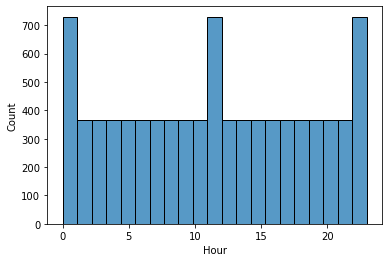

In [46]:
plt.figure()
sns.histplot(df['Hour'])

<AxesSubplot:xlabel='year', ylabel='count'>

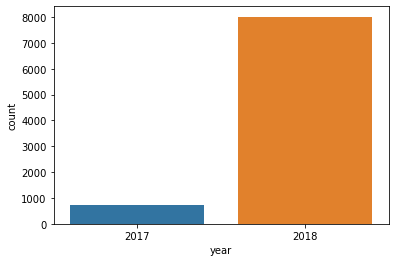

In [47]:
sns.countplot(x='year', data=df)

In [48]:
df.corr()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(°C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(°C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


In [56]:
df['Seasons'] = df['Seasons'].astype('category')
df['Holiday'] = df['Holiday'].astype('category')
df['Functioning Day'] = df['Functioning Day'].astype('category')
df['day'] = df['day'].astype('category')
df['month'] = df['month'].astype('category')
df['year'] = df['year'].astype('category')


df['Seasons'] = df['Seasons'].cat.codes
df['Holiday'] = df['Holiday'].cat.codes
df['Functioning Day'] = df['Functioning Day'].cat.codes
df['day'] = df['day'].cat.codes
df['month'] = df['month'].cat.codes
df['year'] = df['year'].cat.codes

In [58]:
df = pd.get_dummies(df, columns= ['Seasons', 'Holiday','Functioning Day','day','month','year'], drop_first= True)

In [59]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,year_1
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0


In [117]:
x = df.drop(['Rented Bike Count','Dew point temperature(°C)','Temperature(°C)'], axis=1)
y= df['Rented Bike Count']

In [118]:
# Train Test Split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=101)

In [119]:
# Vriance Inflation Factor (VIF)

from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = x

vif = pd.DataFrame()
vif['Variance Inflation Factor'] = [variance_inflation_factor(variable, i) 
                                    for i in range(variable.shape[1])]
vif['Features'] = x.columns
vif

,Variance Inflation Factor,Features
0,1.147664,Hour
1,3.122703,Humidity(%)
2,1.363287,Wind speed (m/s)
3,2.136910,Visibility (10m)
4,1.786226,Solar Radiation (MJ/m2)
5,1.084379,Rainfall(mm)
6,1.213441,Snowfall (cm)
7,inf,Seasons_1
8,inf,Seasons_2
9,inf,Seasons_3


In [120]:
# Linear Regression

from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [121]:
reg_model = smf.OLS(endog = y_train, exog= x_train).fit()
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     156.6
Date:                Mon, 03 Apr 2023   Prob (F-statistic):               0.00
Time:                        21:03:11   Log-Likelihood:                -45821.
No. Observations:                6132   AIC:                         9.174e+04
Df Residuals:                    6081   BIC:                         9.209e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Hour                       32.0701      0.844     37.981      0.000      30.415      33.725
Humidity(%)                -9.1941      0.472    -19.462      0.000     -10.120      -8.268
Wind speed (m/s)           19.1484      6.137      3.120      0.002       7.117      31.180
Visibility (10m)           -0.0463      0.013     -3.508      0.000      -0.072      -0.020
Solar Radiation (MJ/m2)   -37.8190      8.424     -4.489      0.000     -54.334     -21.304
Rainfall(mm)              -61.5976      5.064    -12.163      0.000     -71.525     -51.670
Snowfall (cm)              18.9205     14.110      1.341      0.180      -8.741      46.582
Seasons_1                 -19.5489     16.457     -1.188      0.235     -51.811      12.713
Seasons_2                 260.7906     19.218     13.570      0.000     223.116     298.465
Seasons_3                -690.7067     21.976    -31.431      0.000    -733.787    -647.627
Holiday_1                 128.8951     27.537      4.681      0.000      74.913     182.877
Functioning Day_1         893.0332     32.928     27.121      0.000     828.482     957.584
day_1                     -59.9537     43.229     -1.387      0.166    -144.698      24.791
day_2                      71.3261     43.179      1.652      0.099     -13.320     155.973
day_3                      40.2802     43.649      0.923      0.356     -45.287     125.847
day_4                     -39.2848     43.154     -0.910      0.363    -123.882      45.313
day_5                      63.3124     43.591      1.452      0.146     -22.141     148.766
day_6                      37.3158     42.378      0.881      0.379     -45.759     120.391
day_7                      -7.5318     43.199     -0.174      0.862     -92.218      77.154
day_8                      -6.6936     42.722     -0.157      0.876     -90.444      77.057
day_9                       0.0935     42.856      0.002      0.998     -83.920      84.107
day_10                    -26.6235     43.172     -0.617      0.537    -111.255      58.008
day_11                    -25.6991     42.641     -0.603      0.547    -109.292      57.893
day_12                    137.7064     42.272      3.258      0.001      54.838     220.575
day_13                     98.6775     43.263      2.281      0.023      13.866     183.489
day_14                     26.6381     43.457      0.613      0.540     -58.553     111.829
day_15                      3.1015     43.410      0.071      0.943     -81.997      88.200
day_16                    -12.7654     42.857     -0.298      0.766     -96.780      71.249
day_17                    -70.1491     42.932     -1.634      0.102    -154.311      14.013
day_18                     -2.1736     43.117     -0.050      0.960     -86.697      82.350
day_19                      2.8684     43.916  

In [123]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [124]:
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

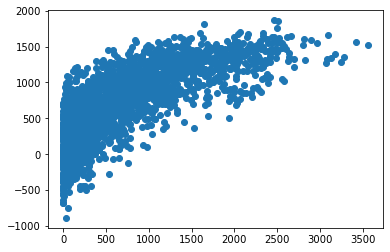

In [125]:
plt.scatter(y_test, y_pred_test)

In [126]:
from sklearn.metrics import accuracy_score, r2_score

In [127]:
print(r2_score(y_pred_train, y_train))
print(r2_score(y_pred_test, y_test))

0.22356456758239696
0.18852462851391916


In [128]:
# Decison Tree Regression model

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)

DecisionTreeRegressor()

In [129]:
y_pred_train = regressor.predict(x_train)
y_pred_test = regressor.predict(x_test)

In [130]:
print(r2_score(y_train, y_pred_train))
print('****'*15)
print(r2_score(y_test, y_pred_test))

1.0
************************************************************
0.7506209020660697


In [137]:
# Random Forest- Ensemble Learning

from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=80)
rf_model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=80)

In [138]:
y_pred_train = rf_model.predict(x_train)
y_pred_test = rf_model.predict(x_test)

In [139]:
print(r2_score(y_train, y_pred_train))
print('****'*15)
print(r2_score(y_test, y_pred_test))

0.9796331484839919
************************************************************
0.8746192879971408


In [ ]:
# Lasso Method

In [140]:
from sklearn.linear_model import Ridge, RidgeCV, LassoCV, ElasticNet
import statsmodels.api as sma

In [141]:
lasso_model = LassoCV(cv=10, max_iter=100, normalize=True)
lasso_model.fit(x_train, y_train)

LassoCV(cv=10, max_iter=100, normalize=True)

In [142]:
print(lasso_model.score(x_train,y_train))
print(lasso_model.score(x_test,y_test))

0.5627435223189139
0.5566108056890551


In [ ]:
# Ridge Method

In [143]:
ridgecv = RidgeCV(cv=9, normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=9, normalize=True)

In [144]:
print(ridgecv.score(x_train,y_train))
print(ridgecv.score(x_test,y_test))

0.5551755781065357
0.5499488732657498
